In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [58]:
fake=pd.read_csv('http://bit.ly/2BpcP2Y')
fake.sample(5)

,Unnamed: 0,title,text,label
1543,2949,Saudi Arabia says farewell to King Abdullah,(CNN) Thousands gathered in Riyadh on Friday t...,REAL
1530,141,Stop poisoning the race debate: How “respectab...,Indeed this movement has its fair share of ske...,REAL
3283,9958,BREAKING: U.S. And Russian Jets Almost Collide...,"Pinterest \nAs the Syrian Civil War rages on, ...",FAKE
2689,8346,Assange tells the sordid truth about the US el...,VIDEOS Assange tells the sordid truth about th...,FAKE
2880,4953,Gary Johnson Avoids Typical Third-Party Fade; ...,A couple of weeks ago in this space I pushed b...,REAL


In [59]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\rabis\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [60]:
fake.shape

(6335, 4)

In [61]:
fake.title.sample(10)

3290    The teachable moment of Saudi Arabia’s economi...
4363          Clinton Foundation: 'Yes, we made mistakes'
790     Trump’s Star Vandalized On Hollywood Walk Of F...
5650    Geoengineering Watch Global Alert News, Novemb...
2833    Thousands Of “Organic” Beauty Products Found C...
1433           Santorum talks 2016, minimum wage increase
5074    Hillary Clinton To Announce Presidential Bid O...
997     SHOCK VIDEO : Hillary Needs Help Climbing ONE ...
5780    Human Rights group alarmed at extra-judicial k...
3055    CHARLESTON ‘ON EGGSHELLS’ ON EVE OF TWO RACIAL...
Name: title, dtype: object

In [62]:
fake.text.sample(10)

6096    By Lasha Darkmoon on November 1, 2016 Tom Leon...
6054    Man gets only one missed call from Mom Local M...
5479    A Waco restaurant was the scene Sunday where m...
5454    0 comments \nWell, here’s a lesson for ya! Com...
569     What once was considered “pie in the sky” is s...
5724      Carol Adl in Middle East , News , World // 0...
6248    AMERICA VANQUISHED, Part 1: America as an Isra...
140     Sharpton Attacks O’Keefe, So O’Keefe Releases ...
5010    ISIS Extremist Who Beheaded Prisoners Is Ident...
2127    Republican presidential candidate Carly Fiorin...
Name: text, dtype: object

In [63]:
fake=fake.set_index('Unnamed: 0')

In [64]:
fake.sample(5)

,title,text,label
Unnamed: 0,,,
8924,"Without Bold Agenda, Warn Progressives, A Clin...","Without Bold Agenda, Warn Progressives, A Clin...",FAKE
6451,"Hey Bernie Supporters, Here are 45 Times Hilla...","11. July 10, 2012: Remarks With Foreign Minist...",FAKE
5630,"They Said What?!: Find Out What Liam Neeson, L...",Email Ever wonder what’s on the mind of today’...,FAKE
4982,Clinton's health continues to spur controversy...,A two-page letter from Hillary Clinton's docto...,REAL
6608,Facebook user wastes two hours sharing things ...,Wednesday 2 November 2016 Facebook user wastes...,FAKE


In [65]:
y=fake.label

In [66]:
fake=fake.drop('label', axis=1)

In [67]:
X_train, X_test, y_train, y_test=train_test_split(fake['text'], y, test_size=0.33, random_state=53)

In [68]:
count_vectorizer=CountVectorizer(stop_words='english')
count_train=count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)

In [69]:
tfid_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfid_train=tfid_vectorizer.fit_transform(X_train)
tfid_test=tfid_vectorizer.transform(X_test)

In [70]:
tfid_vectorizer.get_feature_names()[:9]

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft']

In [71]:
count_vectorizer.get_feature_names()[:10]

['00',
 '000',
 '0000',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000ft',
 '000km']

In [72]:
count_fake=pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())


In [ ]:
tfid_fake=pd.DataFrame(tfid_train.A, columns=tfid_vectorizer.get_feature_names())

In [ ]:
difference=set(count_fake.columns)-set(tfid_fake.columns)
difference

In [ ]:
print(count_fake.equals(tfid_fake))

False


In [ ]:
count_fake.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tfid_fake.sample(5)

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
3787,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4029,0.0,0.033043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4019,0.0,0.028950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3954,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [79]:
clf=MultinomialNB()

accuracy:   0.893
Confusion matrix, without normalization


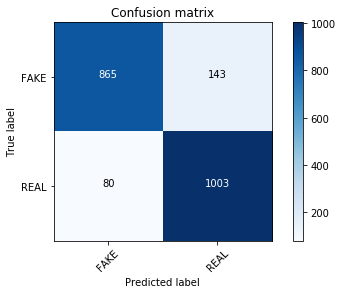

In [83]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [84]:
linear_clf= PassiveAggressiveClassifier(n_iter=50)


accuracy: 0.941
Confusion matrix, without normalization


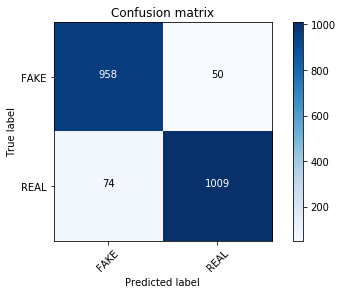

In [90]:
linear_clf.fit(tfid_train, y_train)
pred=linear_clf.predict(tfid_test)
score=metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm=metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm , classes=['FAKE', 'REAL'])

accuracy:   0.934
Confusion matrix, without normalization


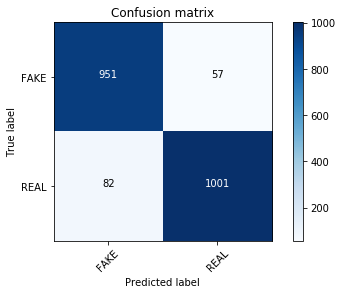

In [89]:
linear_clf.fit(tfid_train, y_train)
pred = linear_clf.predict(tfid_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [91]:
clf=MultinomialNB(alpha=0.1)

In [94]:
last_score=0
for alpha in np.arange(0,1,.1):
    nb_classifier=MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfid_train, y_train)
    pred=nb_classifier.predict(tfid_test)
    score=metrics.accuracy_score(y_test , pred)
    if score>last_score:
        clf=nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

C:\Users\rabis\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


In [96]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    class_labels=classifier.classes_
    feature_names=vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfid_vectorizer, linear_clf, n=30)
    

FAKE -5.048340646402721 2016
FAKE -4.320414261885278 october
FAKE -4.033678020856538 hillary
FAKE -3.2377800260948426 share
FAKE -3.0621281389979473 article
FAKE -2.8048359720070057 november
FAKE -2.4702368458997763 print
FAKE -2.38660174780935 advertisement
FAKE -2.364940693774054 email
FAKE -2.3565545289416505 oct
FAKE -2.33110920591635 source
FAKE -2.2093774723782316 mosul
FAKE -2.16134063737574 podesta
FAKE -2.1123097532598902 election
FAKE -2.0197077166993767 war
FAKE -2.0070016989156327 establishment
FAKE -2.002208765590049 pipeline
FAKE -1.9226970844131128 com
FAKE -1.868422681924008 corporate
FAKE -1.8517910806988445 28
FAKE -1.8416000732464786 26
FAKE -1.8300036371769801 photo
FAKE -1.822948135814101 nov
FAKE -1.800659275378284 snip
FAKE -1.7631159005579824 wikileaks
FAKE -1.7385811240585771 dr
FAKE -1.7211470018308694 jewish
FAKE -1.7100549022577922 donald
FAKE -1.7044169386871784 ayotte
FAKE -1.6838478393303675 daesh

REAL 4.824203667589185 said
REAL 2.6329009331680817 tuesd

In [97]:
feature_names=tfid_vectorizer.get_feature_names()

In [98]:
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.349866225220305, '0000'),
 (-11.349866225220305, '000035'),
 (-11.349866225220305, '0001'),
 (-11.349866225220305, '0001pt'),
 (-11.349866225220305, '000km'),
 (-11.349866225220305, '0011'),
 (-11.349866225220305, '006s'),
 (-11.349866225220305, '007'),
 (-11.349866225220305, '007s'),
 (-11.349866225220305, '008s'),
 (-11.349866225220305, '0099'),
 (-11.349866225220305, '00am'),
 (-11.349866225220305, '00p'),
 (-11.349866225220305, '00pm'),
 (-11.349866225220305, '014'),
 (-11.349866225220305, '015'),
 (-11.349866225220305, '018'),
 (-11.349866225220305, '01am'),
 (-11.349866225220305, '020'),
 (-11.349866225220305, '023')]

In [99]:
tokens_with_weights=sorted(list(zip(feature_names, clf.coef_[0])))

In [100]:
hash_vectorizer=HashingVectorizer(stop_words='english', non_negative=True)
hash_train=hash_vectorizer.fit_transform(X_train)
hash_test=hash_vectorizer.transform(X_test)

In [101]:
clf=MultinomialNB(alpha=.01)

Accuracy: 0.902
Confusion matrix, without normalization


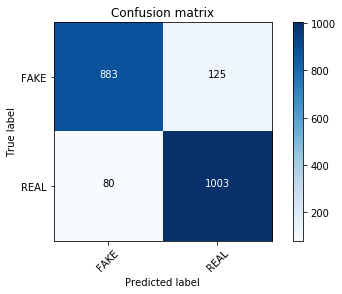

In [103]:
clf.fit(hash_train, y_train)
pred=clf.predict(hash_test)
score=metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)
cm=metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])